In [1]:
import Pkg
Pkg.activate("jupyter")
Pkg.instantiate()

Activating environment at `~/VGG.jl/jupyter/Project.toml`
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In [2]:
using Knet
using VGG
using Images
using TestImages

if Knet.gpu() >= 0
    ATYPE = KnetArray{Float32}
else
    ATYPE = Array{Float32}
end

KnetArray{Float32,N} where N

size(img) = (512, 512)
typeof(img) = 

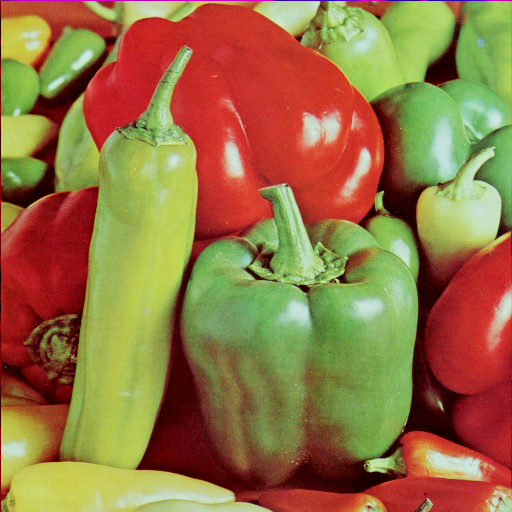

Array{RGB{Normed{UInt8,8}},2}


In [3]:
img = testimage("pepper");
#img = testimage("toucan");
#img = load("elephant.jpg");
@show size(img)
@show typeof(img)
img |> display

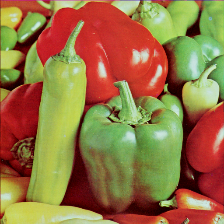

size(img) = (224, 224)
typeof(img) = Array{RGB{Normed{UInt8,8}},2}


In [4]:
img = imresize(img, 224,224);
@show size(img)
@show typeof(img)
img |> display

In [5]:
model = load_model(VGG19; atype=ATYPE);

In [6]:
model.mean_color

1×1×3 Array{Float32,3}:
[:, :, 1] =
 123.68

[:, :, 2] =
 116.779

[:, :, 3] =
 103.939

In [7]:
x = permutedims(channelview(img), (2,3,1)) .|> Float32;
x = reshape(x,size(x)...,1);
x = x .* 255 .- model.mean_color;

x = convert(ATYPE, x);

In [8]:
o = model(x)

1000×1 KnetArray{Float32,2}:
 7.437957e-8  
 5.8925843e-6 
 4.4326707e-9 
 4.302024e-9  
 4.68496e-9   
 5.8913505e-9 
 2.1925073e-9 
 1.157879e-8  
 2.7520037e-9 
 4.3162984e-10
 7.926465e-10 
 1.6474901e-8 
 6.200293e-9  
 ⋮            
 1.2667756e-6 
 4.5128363e-5 
 9.63701e-7   
 8.9744435e-7 
 4.3572727e-6 
 6.8095105e-8 
 1.1741405e-8 
 4.1955244e-7 
 1.3733785e-6 
 1.1189286e-7 
 0.0006680887 
 5.090263e-8  

In [9]:
model.class_descs[argmax(o)[1]]

"bell pepper"